In [3]:
import numpy as np
import math
import numpy.matlib as matlib
import matplotlib.pyplot as plt
import operator

# The highest-level BPS algorithm (basic version)

Thoughts and Questions:

1. Do I need to randomise the initialisation of x_0, v_0?

2. I wonder whether there is a symbolic differentiation function to obtain gradients of a real-valued multi-variate function.

3. In step 2(d), 2(e) of Algorithm 1, what if tau_bounce = tau_ref?

4. I have sent an email to Tomas to ask how he created the graphs superimposing colour maps and particle trajectory in his thesis.

In [4]:
def BPS_basic(x0, v0, Time, lambda_ref, prob_dist, intermediate_times):
    
    turn_pts = [x0]
    list_of_velo = [v0]
    striding_times = [0]
    dim = x0.size
    i = 1
    x = x0
    v = v0
    t = 0
    while t < Time:

        
        tau_bounce = prob_dist.bounce_time(x, v)
        

        
    
        beta = 1/lambda_ref
        tau_ref = np.random.exponential(scale = beta)
        
        
        
        

        tau = min(tau_bounce, tau_ref)
        x = x + tau*v

        t = t + tau
        
        
        if tau_ref < tau_bounce:
            v = np.random.standard_normal(dim)
        else:
            v = v - 2*(np.sum(prob_dist.ener_grad(x)*v))/(np.sum(prob_dist.ener_grad(x)*prob_dist.ener_grad(x)))*prob_dist.ener_grad(x)

        
        
        
        list_of_velo.append(v)
        turn_pts.append(x)
        striding_times.append(t)
        
        
        
        
        
        i = i+1

        


    
    num_changes = len(turn_pts)
    
    
    
    
# The following are the codes for sampling specific time points of the BPS process:
    
    
    if intermediate_times == ['turning_pts', 'N/A']:
        
        return turn_pts, list_of_velo, striding_times     # [x_list, v_list, t_list]
    
    
    
    
    
    
    elif intermediate_times[0] == 'regu_time_interval':    # for example, intermediate_times = ['regu_time_interval', 0.5]
    
        create_interm_time = np.arange(0, striding_times[-1], intermediate_times[1])
        
        num_required_times = len(create_interm_time)
        
        tiling_interm_times = np.transpose(np.tile(create_interm_time, (num_changes, 1)))
        
        testing_mat_1 = tiling_interm_times - np.tile(striding_times, (num_required_times, 1))
        
        testing_mat_2 = np.where(testing_mat_1 >= 0, 1, 0)
        
        indices_no_later_than = np.sum(testing_mat_2, axis = 1) - 1
        
        turn_pts_no_later = [turn_pts[i] for i in indices_no_later_than]
        
        velo_no_later = [list_of_velo[i] for i in indices_no_later_than]    # Note to self: this gives the velo at that instant
        
        stride_time_no_later = [striding_times[i] for i in indices_no_later_than]
    
        
        
        
        interm_times = list(create_interm_time)
        
        list_of_coasting_times = list(map(operator.sub, interm_times, stride_time_no_later))
    
        distance_strided = list(map(operator.mul, list_of_coasting_times, velo_no_later))
    
        locations_at_required_times = list(map(operator.add, turn_pts_no_later, distance_strided))
        
        
        
        
        return turn_pts, list_of_velo, striding_times, locations_at_required_times, velo_no_later, interm_times
        
        
        # all the 6 outputs are lists
    
    
    
    
    
    
    
    
    
    
    else:       # ie. intermediate_times is a 1D np.array of time points inside [0,Time]
        
        
        num_required_times = len(intermediate_times)
        
        tiling_interm_times = np.transpose(np.tile(intermediate_times, (num_changes, 1)))   #potential error: me understand tile
        
        testing_mat_1 = tiling_interm_times - np.tile(striding_times, (num_required_times, 1))
        
        testing_mat_2 = np.where(testing_mat_1 >= 0, 1, 0)
        
        indices_no_later_than = np.sum(testing_mat_2, axis = 1) - 1    # potential error: may need to use axis = 0
        
        turn_pts_no_later = [turn_pts[i] for i in indices_no_later_than]
        
        velo_no_later = [list_of_velo[i] for i in indices_no_later_than]    # Note to self: this gives the velo at that instant
        
        stride_time_no_later = [striding_times[i] for i in indices_no_later_than]
    
        
        
        
        interm_times = list(intermediate_times)
        
        list_of_coasting_times = list(map(operator.sub, interm_times, stride_time_no_later))
    
        distance_strided = list(map(operator.mul, list_of_coasting_times, velo_no_later))
    
        locations_at_required_times = list(map(operator.add, turn_pts_no_later, distance_strided))
        
        
        
        
        return turn_pts, list_of_velo, striding_times, locations_at_required_times, velo_no_later, interm_times
    
        # all the 6 outputs are lists
    
        
    
    
    

        
        

(8th June 2020) The following code is what I wrote into my project report (for the highest-level BPS algorithm). 

In [18]:
def BPS_basic(x0, v0, Time, lambda_ref, prob_dist):
    
    turn_pts = [x0]
    list_of_velo = [v0]
    striding_times = [0]
    dim = x0.size
    i = 1
    x = x0
    v = v0
    t = 0
    
    while t < Time:

        tau_bounce = prob_dist.bounce_time(x, v)
        beta = 1/lambda_ref
        tau_ref = np.random.exponential(scale = beta)
        tau = min(tau_bounce, tau_ref)
        
        x = x + tau*v
        t = t + tau
        
        if tau_ref < tau_bounce:
            v = np.random.standard_normal(dim)
        else:
            v = v - 2*(np.sum(prob_dist.ener_grad(x)*v))/(np.sum(prob_dist.ener_grad(x)*
                                                                 prob_dist.ener_grad(x)))*prob_dist.ener_grad(x)
        
        list_of_velo.append(v)
        turn_pts.append(x)
        striding_times.append(t)
        
        i = i+1

    return turn_pts, list_of_velo, striding_times     # [x_list, v_list, t_list]

# The following function allows us to return lists of locations and velocities on arbitrary list of time points on a trajectory.

First 3 arguments: lists;

The last argument: 1D numpy arrays

Personal guess: I don't require time instants in intermediate_times to be in ascending order; moreover, it should be fine to have repeated entries in intermediate_times. Under these 2 circumstances, the function should still work.

In [4]:
def x_v_t_arbitrary_times(turn_pts, list_of_velo, striding_times, intermediate_times):
    
    num_changes = len(turn_pts)
    
    num_required_times = len(intermediate_times)
        
    tiling_interm_times = np.transpose(np.tile(intermediate_times, (num_changes, 1)))   #potential error: me understand tile
        
    testing_mat_1 = tiling_interm_times - np.tile(striding_times, (num_required_times, 1))
        
    testing_mat_2 = np.where(testing_mat_1 >= 0, 1, 0)
        
    indices_no_later_than = np.sum(testing_mat_2, axis = 1) - 1    # potential error: may need to use axis = 0
        
    turn_pts_no_later = [turn_pts[i] for i in indices_no_later_than]
        
    velo_no_later = [list_of_velo[i] for i in indices_no_later_than]    # Note to self: this gives the velo at that instant
        
    stride_time_no_later = [striding_times[i] for i in indices_no_later_than]
    
        
        
        
    interm_times = list(intermediate_times)
        
    list_of_coasting_times = list(map(operator.sub, interm_times, stride_time_no_later))
    
    distance_strided = list(map(operator.mul, list_of_coasting_times, velo_no_later))
    
    locations_at_required_times = list(map(operator.add, turn_pts_no_later, distance_strided))
        
        
        
        
    return locations_at_required_times, velo_no_later, interm_times
    
        # all the 4 outputs are lists

(8th June 2020) The following code is what I wrote into my project report. 

In [5]:
import numpy as np
import math
import operator

def x_v_t_arbitrary_times(turn_pts, list_of_velo, striding_times, intermediate_times):
    
    num_changes = len(turn_pts)
    num_required_times = len(intermediate_times)
    tiling_interm_times = np.transpose(np.tile(intermediate_times, (num_changes, 1)))
    testing_mat_1 = tiling_interm_times - np.tile(striding_times, (num_required_times, 1))
    testing_mat_2 = np.where(testing_mat_1 >= 0, 1, 0)
    indices_no_later_than = np.sum(testing_mat_2, axis = 1) - 1
        
    turn_pts_no_later = [turn_pts[i] for i in indices_no_later_than]
    velo_no_later = [list_of_velo[i] for i in indices_no_later_than]
    stride_time_no_later = [striding_times[i] for i in indices_no_later_than]
    
       
    interm_times = list(intermediate_times)
        
    list_of_coasting_times = list(map(operator.sub, interm_times, stride_time_no_later))
    distance_strided = list(map(operator.mul, list_of_coasting_times, velo_no_later))
    locations_at_required_times = list(map(operator.add, turn_pts_no_later, distance_strided))
        

    return locations_at_required_times, velo_no_later, interm_times

In [4]:
math.ceil(1.5)

2

# Multivariate Gaussian Distribution

In [5]:

class Gaussian:
    
    def __init__(self, mean, cov_mat):
        
        self.mean = mean
        self.cov_mat = cov_mat
        self.dim = mean.size
    
    
    
    
    
    def energy(self, x): # constant coeff is discarded
        return 0.5*((x - self.mean).dot(np.linalg.inv(self.cov_mat)).dot(x - self.mean))
        
        
        
        
    def ener_grad(self, x):
        return (np.linalg.inv(self.cov_mat)).dot(x - self.mean)
    
    
    
    
    
    def bounce_time(self, x, v):
        
        # V has uniform distribution over (0,1]. The issue of log(0) has to be avoided.
        V = np.random.uniform()*(-1)+1   
        
        sigma_inv_x_minus_mu = (np.linalg.inv(self.cov_mat)).dot(x - self.mean)
        sigma_inv_v = (np.linalg.inv(self.cov_mat)).dot(v)
        abbr = np.sum(sigma_inv_v*v)
        thres = np.sum(sigma_inv_x_minus_mu*v)
        
        if thres > 0:
            tau_bounce = (1/abbr)*((math.sqrt(thres**2 - 2*abbr*math.log(V))) - thres)
        else:
            tau_bounce = (1/abbr)*(math.sqrt(-2*abbr*math.log(V)) - thres)
            
        return tau_bounce

# [29-6-2020]: The following is what I write into my report.

In [ ]:
import numpy as np
import math

class Gaussian:
    def __init__(self, mean, cov_mat):
        self.mean = mean
        self.cov_mat = cov_mat
        self.dim = mean.size
        
        
    def energy(self, x):   # constant coeff is discarded
        return 0.5*((x - self.mean).dot(np.linalg.inv(self.cov_mat)).dot(x - self.mean))      
    
    
    def ener_grad(self, x):
        return (np.linalg.inv(self.cov_mat)).dot(x - self.mean)

    
    def bounce_time(self, x, v):
        V = np.random.uniform()*(-1)+1   # V has uniform distribution over (0,1]. The issue of math.log(0) avoided.
        
        sigma_inv_x_minus_mu = (np.linalg.inv(self.cov_mat)).dot(x - self.mean)
        sigma_inv_v = (np.linalg.inv(self.cov_mat)).dot(v)
        abbr = np.sum(sigma_inv_v*v)
        thres = np.sum(sigma_inv_x_minus_mu*v)
        
        if thres > 0:
            tau_bounce = (1/abbr)*((math.sqrt(thres**2 - 2*abbr*math.log(V))) - thres)
        else:
            tau_bounce = (1/abbr)*(math.sqrt(-2*abbr*math.log(V)) - thres)
        
        return tau_bounce

# Algorithm 2: Standard Thinning (p.6)

Question: don't know how to implement step 2(c) of Algorithm 2. (empty arrivals)

In [ ]:
def thinning_stand(exact_inten, approx_inten_list, approx_arrival_list, x, v):
    
    s = 0
    tau = 0
    
    num_bounds = len(approx_inten_list)
    
    approx_arrivals = [0]*num_bounds
    
    breaking = 0
    
    while breaking == 0:
        
        s = tau
        

        
        for i in range(num_bounds):
            V = np.random.uniform()*(-1) + 1
            quad = [V, x, v, s]
            approx_arrivals[i] = (approx_arrival_list[i])(quad)
        
        
        tau = min(approx_arrivals) + s
        
        W = np.random.uniform()
        
        chi_approx = 0
        
        triple = [x, v, tau]
        
        for i in range(num_bounds):
            chi_approx += max(0, (approx_inten_list[i])(triple))
        
        if W <= max(0, exact_inten(triple))/chi_approx:
            breaking = 1
            
    return tau

[2-7-2020] The following is what I wrote into my report:

In [6]:
def thinning_stand(exact_intensity, intensity_list, approx_arrival_list, x, v):
    
    s = 0
    tau = 0
    num_bounds = len(intensity_list)
    approx_arrivals = [0]*num_bounds
    breaking = 0
    
    
    while breaking == 0:
        s = tau

        for i in range(num_bounds):
            V = np.random.uniform()*(-1) + 1
            quad = [V, x, v, s]
            approx_arrivals[i] = (approx_arrival_list[i])(quad)
        tau = min(approx_arrivals) + s
        
        
        W = np.random.uniform()
        chi_approx = 0
        triple = [x, v, tau]
        for i in range(num_bounds):
            chi_approx += (intensity_list[i])(triple)
        
        
        if W <= exact_intensity(triple)/chi_approx:
            breaking = 1
       
    
    return tau

# Logistic Regression

Assumption made by the paper: all input data have non-negative entries.

In [7]:


class Logistic_Reg:
    
    
    def __init__(self, data_input, data_output):   # data_input: [R,d]   output: [R]
        
        self.dist_dim = data_input.shape[1]
        self.num_data = data_input.shape[0]
        self.data_input = data_input
        self.data_output = data_output
        
        # params for Gaussian prior
        self.mean = np.zeros(self.dist_dim)
        self.cov_mat = np.identity(self.dist_dim)
        self.inv_cov = np.linalg.inv(self.cov_mat)
        
        
#      self.lambda_intensity = lambda triple: triple[1].dot((self.inv_cov).dot(triple[0]+triple[1]*triple[2] - self.mean)) - (self.data_output).dot((self.data_input).dot(triple))
        # triple: [x,v,t]
      
        
        
        
    def energy(self, x):   # Data: [d]

        
        
        prior = Gaussian(self.mean , self.cov_mat)
        
        
        dot_prod = (self.data_input.dot(x))
        
        log_denom = np.log(1 + np.exp(dot_prod))
        log_numer = (dot_prod)*self.data_output
        
        
        return (prior.energy(x) - np.sum(log_numer) + np.sum(log_denom))
    
    
    
    
    def ener_grad(self, x): # x is np.array with dim = [d]
        
        lin_trans = (self.data_input).dot(x)
        
        logistic_lin_trans = 1/(1 + np.exp(-lin_trans)) - self.data_output
        
        sum_to_R = logistic_lin_trans.dot(self.data_input)
        
        return (self.inv_cov).dot(x - self.mean) + sum_to_R
        
        
        
        

        
    
    
    
    
    
    def bounce_time(self, x,v):
        
        label_parity = (-1)**self.data_output
        outer_product = (label_parity.reshape(-1,1)).dot(v.reshape(1,-1))
        first_sigma = np.sum(self.data_input*np.where(outer_product > 0, 1, 0), 0)       
        
        second_sigma = first_sigma.dot(np.abs(v))
        
        
        
        intensity_1 = lambda triple: triple[1].dot((self.inv_cov).dot(triple[0]+triple[1]*triple[2] - self.mean))
        # triple: [x,v,t]
        
        intensity_2 = lambda triple: second_sigma
        # triple: [x,v,t]
        
        intensity_list = [intensity_1, intensity_2]
        
        
        
        
        
        
        arrival_1 = lambda quad: (math.sqrt((((self.inv_cov).dot(quad[1]+quad[3]*quad[2]-self.mean)).dot(quad[2]))**2 - 2*(((self.inv_cov).dot(quad[2])).dot(quad[2]))*math.log(quad[0])) - (((self.inv_cov).dot(quad[1]+quad[3]*quad[2]-self.mean)).dot(quad[2])))/(((self.inv_cov).dot(quad[2])).dot(quad[2]))            if (((self.inv_cov).dot(quad[1]+quad[3]*quad[2]-self.mean)).dot(quad[2])) > 0               else (math.sqrt(-2*(((self.inv_cov).dot(quad[2])).dot(quad[2]))*math.log(quad[0])) - (((self.inv_cov).dot(quad[1]+quad[3]*quad[2]-self.mean)).dot(quad[2])))/(((self.inv_cov).dot(quad[2])).dot(quad[2]))
        # quad: [V,x,v,s]
        
        arrival_2 = lambda quad: -(1/second_sigma)*math.log(quad[0])      if second_sigma > 0        else math.inf
        # quad: [V,x,v,s]
        
        arrival_list = [arrival_1, arrival_2]
        
        
        
        
        
        lin_trans = lambda x1: (self.data_input).dot(x1)
        logistic_lin_trans = lambda x2: 1/(1 + np.exp(-x2)) - self.data_output
        sum_to_R = lambda x3: (x3).dot(self.data_input)
        ener_grad_1 = lambda x1: (self.inv_cov).dot(x1 - self.mean) + sum_to_R(logistic_lin_trans(lin_trans(x1)))
        
        
        
        # for some reason, using self.ener_grad here does not work, so I build ener_grad_1
        lambda_intensity = lambda triple: triple[1].dot(ener_grad_1(triple[0] + triple[1]*triple[2]))
        # triple: [x,v,t]
        
        
        
        
        
        tau = thinning_stand(lambda_intensity, intensity_list, arrival_list, x, v)
        
        
        
        return tau

(2 July 2020) The following is the code I write into the report:

In [7]:
class Logistic_Reg:

    def __init__(self, data_input, data_output):   # data_input: [N,d]   output: [N]
        self.dist_dim = data_input.shape[1]
        self.num_data = data_input.shape[0]
        self.data_input = data_input
        self.data_output = data_output
        
        # params for Gaussian prior
        self.mean = np.zeros(data_input.shape[1])
        self.cov_mat = np.identity(data_input.shape[1])
        self.inv_cov = np.linalg.inv(self.cov_mat)

  
    def energy(self, w):   # x: [d]
        prior = Gaussian(self.mean , self.cov_mat)

        dot_prod = (self.data_input).dot(w)
        log_denom = np.log(1 + np.exp(dot_prod))
        log_numer = (dot_prod)*self.data_output
        return (prior.energy(w) - np.sum(log_numer) + np.sum(log_denom))
    

    def ener_grad(self, w): # x: [d]
        
        lin_trans = (self.data_input).dot(w)
        logistic_lin_trans = 1/(1 + np.exp(-lin_trans)) - self.data_output
        sum_to_R = logistic_lin_trans.dot(self.data_input)
        return (self.inv_cov).dot(w - self.mean) + sum_to_R
        

    def bounce_time(self, x, v):
        
        label_parity = (-1)**self.data_output
        outer_product = (label_parity.reshape(-1,1)).dot(v.reshape(1,-1))
        first_sigma = np.sum(self.data_input*np.where(outer_product > 0, 1, 0), 0)       
        second_sigma = first_sigma.dot(np.abs(v))

        
        # triple: [x,v,t]
        intensity_1 = lambda triple: max(0, triple[1].dot((self.inv_cov).dot(triple[0]+triple[1]*triple[2] - self.mean)))
        intensity_2 = lambda triple: second_sigma
        intensity_list = [intensity_1, intensity_2]


        # quad: [V,x,v,s]
        arrival_1 = lambda quad: (math.sqrt((((self.inv_cov).dot(quad[1]+quad[3]*quad[2]-self.mean)).dot(quad[2]))**2 - 
                                            2*(((self.inv_cov).dot(quad[2])).dot(quad[2]))*math.log(quad[0])) - 
                                  (((self.inv_cov).dot(quad[1]+quad[3]*quad[2]-self.mean)).dot(quad[2])))/(((self.inv_cov).dot(quad[2])).dot(quad[2]))            if (((self.inv_cov).dot(quad[1]+quad[3]*quad[2]-self.mean)).dot(quad[2])) > 0               else (math.sqrt(-2*(((self.inv_cov).dot(quad[2])).dot(quad[2]))*math.log(quad[0])) - (((self.inv_cov).dot(quad[1]+quad[3]*quad[2]-self.mean)).dot(quad[2])))/(((self.inv_cov).dot(quad[2])).dot(quad[2]))
        
        arrival_2 = lambda quad: -(1/second_sigma)*math.log(quad[0])      if second_sigma > 0        else math.inf
        arrival_list = [arrival_1, arrival_2]
        
        
        # Construction of ener_grad_1
        lin_trans = lambda x1: (self.data_input).dot(x1)
        logistic_lin_trans = lambda x2: 1/(1 + np.exp(-x2)) - self.data_output
        sum_to_R = lambda x3: (x3).dot(self.data_input)
        ener_grad_1 = lambda x1: (self.inv_cov).dot(x1 - self.mean) + sum_to_R(logistic_lin_trans(lin_trans(x1)))
        
        # triple: [x,v,t]
        lambda_intensity = lambda triple: max(0, triple[1].dot(ener_grad_1(triple[0] + triple[1]*triple[2])))
        
        
        # standard thinning
        tau = thinning_stand(lambda_intensity, intensity_list, arrival_list, x, v)
        
        
        return tau

# Exponential Family (Poisson Likelihood)

Note: I attempt to generalise the class here to having multiple observations - not just 1.

Unlike the class Logistic_Reg, the class Gaussian has not been utilised here in the energy def.

In [8]:
class Exponential_Poisson_fam:
    
    def __init__(self, y_list):
        
        self.y_list = y_list
        self.num_obs = len(y_list)
        self.phi = sum(y_list)
        
        # params for Gaussian prior
        self.mean = 0
        self.cov = 1    # cov >0
        
        
        self.lambda_intensity = lambda triple: triple[1]*((triple[0]+triple[1]*triple[2]-self.mean)/self.cov - self.phi + self.num_obs*np.exp(triple[0]+triple[1]*triple[2]))
        # triple=[x,v,t]
        
        
    def energy(self, x):   # dim(x)=1
        
        prior_ener = 0.5*((x - self.mean)**2)/self.cov
        
        return prior_ener - x*(self.phi) + self.num_obs*np.exp(x)
    
    
    
    
    
    def ener_grad(self, x):
        
        return x - self.phi + self.num_obs*math.exp(x)
    
    
    
    
    
    def bounce_time(self, x, v):
        
        # intensity functions
        
        # Gaussian
        intensity_1 = lambda triple: ((triple[0]+triple[1]*triple[2]-self.mean)*triple[1])/self.cov
        # triple: [x,v,tau]
        
        # Sufficient Statistics
        intensity_2 = lambda triple: -triple[1]*self.phi
        # triple: [x,v,tau]
        
        # Normalising constant
        intensity_3 = lambda triple: triple[1]*np.exp(triple[0]+triple[1]*triple[2])*self.num_obs
        # triple: [x,v,tau]
        
        intensity_list = [intensity_1, intensity_2, intensity_3]
        
        
        
        
        
        # arrival functions
        
        # Gaussian
        arrival_1 = lambda quad: (np.sqrt((((quad[1]+quad[3]*quad[2]-self.mean)*quad[2]/self.cov)**2) - 2*(quad[2])*(quad[2])*np.log(quad[0])/self.cov) - ((quad[1]+quad[3]*quad[2]-self.mean)*quad[2])/self.cov)/((quad[2])*(quad[2])/self.cov)         if ((quad[1]+quad[3]*quad[2]-self.mean)*quad[2])/self.cov > 0         else (np.sqrt(-2*(quad[2])*(quad[2])*np.log(quad[0])/self.cov) - ((quad[1]+quad[3]*quad[2]-self.mean)*quad[2])/self.cov)/((quad[2])*(quad[2])/self.cov)
        #quad: [V,x,v,s]
        
        # Sufficient Statistics
        arrival_2 = lambda quad: np.log(quad[0])/(quad[2]*self.phi)     if quad[2]*self.phi <0        else math.inf   
        #quad: [V,x,v,s]
        
        # Normalising constant
        arrival_3 = lambda quad: (np.log(np.exp(quad[1]+quad[2]*quad[3])-np.log(quad[0])/self.num_obs) - (quad[1]+quad[2]*quad[3]))/(quad[2])          if (np.log(np.exp(quad[1]+quad[2]*quad[3])-np.log(quad[0])/self.num_obs) - (quad[1]+quad[2]*quad[3]))/(quad[2])>0           else math.inf
        #quad: [V,x,v,s]
        
        arrival_list = [arrival_1, arrival_2, arrival_3]
        
        
        
        
        
        tau = thinning_stand(self.lambda_intensity, intensity_list, arrival_list, x, v)
        
        
        return tau

# Execute real examples, debugging, and plot graphs

# Multivariate Gaussian distribution

In [39]:
mean = np.array([0,0])
cov_mat = np.array([[1,0],[0,1]])

gaus_test = Gaussian(mean, cov_mat)

In [16]:

x0 = np.array([1,2])
v0 = np.array([-4,-3])
Time = 100
lambda_ref = 0.2
prob_dist = gaus_test



x_list_gaus, v_list_gaus, t_list_gaus = BPS_basic(x0=x0, v0=v0, Time=Time, lambda_ref=lambda_ref, prob_dist=prob_dist, intermediate_times=['turning_pts', 'N/A'])

TypeError: BPS_basic() got an unexpected keyword argument 'intermediate_times'

In [25]:
len(x_list_gaus)

81

In [10]:
print('List of velocities: ')
print(*v_list_gaus, sep = "\n")
print(' ')
print('Magnitude of velocities: ')
print(*[x.dot(x) for x in v_list_gaus], sep = "\n")

List of velocities: 
[-4 -3]
[ 4.97053436 -0.54202228]
[0.70363896 4.95024163]
[-1.33775783  0.47320999]
[ 0.42173127 -0.3635798 ]
[-0.10896184  0.5460539 ]
[-0.0882308   0.14012989]
[1.65201993 0.74304664]
[-1.12655891 -1.41850385]
[0.72370334 1.66058473]
 
Magnitude of velocities: 
25
25.000000000000007
25.00000000000001
2.0135236972415846
0.3100475383513426
0.31004753835134247
0.027421061681847825
3.281288165810986
3.2812881658109854
3.281288165810983


In [11]:
t_list_gaus

[0,
 0.9065204926027484,
 1.606629147089318,
 1.6154172675014515,
 1.8674178563034483,
 1.9787697945785694,
 3.3494115222814482,
 7.692347672653367,
 8.340195949013411,
 10.4915668138267]

In [12]:
print(len(x_list_gaus) == len(v_list_gaus))
print(len(t_list_gaus) == len(v_list_gaus))

True
True


# Another Gaussian to test

In [21]:
mean = np.array([0,0])
cov_mat = np.identity(2)

gaus_test = Gaussian(mean, cov_mat)


x0 = np.array([-100,-100])
v0 = np.ones(2)
Time = 200
lambda_ref = 0.01
prob_dist = gaus_test



x_list_gaus, v_list_gaus, t_list_gaus = BPS_basic(x0=x0, v0=v0, Time=Time, lambda_ref=lambda_ref, prob_dist=prob_dist)

In [22]:
len(x_list_gaus)

29

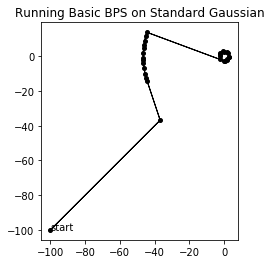

In [23]:
# plotting everything together

gaus_location = np.transpose(x_list_gaus)

horizontal, vertical = gaus_location

colors = (0,0,0)
area = (np.pi*10)
num_points = len(horizontal)

# Plot

# plt.imshow(ener_vals_gaus, cmap='YlOrRd', extent=[-3, 3, -3, 3])

# plt.yticks(np.arange(-3, 4, 1))
# plt.xticks(np.arange(-3, 4, 1))
plt.axes().set_aspect('equal')

plt.scatter(horizontal, vertical, s=area/2, c = np.array([[0,0,0]]))    # if this example code is correct, 1st arg is x-axis; 2nd arg is y-axis.
plt.title('Running Basic BPS on Standard Gaussian')

for i in range(num_points-1):
    plt.arrow(horizontal[i], vertical[i], horizontal[i+1]-horizontal[i], vertical[i+1]-vertical[i], width=0.0001, length_includes_head=True, head_width=0.0001, shape='full')


plt.annotate('start', (-100,-100))
    

plt.show()

# Logistic Regression

In [13]:
list_7 = np.arange(1,8)
sig_coord = np.concatenate((list_7, -list_7))
sig_coord = sig_coord.reshape(14,1)
triv_coord = np.ones((14,1))
data_input = np.concatenate((triv_coord, sig_coord), axis = 1)

data_input

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1., -1.],
       [ 1., -2.],
       [ 1., -3.],
       [ 1., -4.],
       [ 1., -5.],
       [ 1., -6.],
       [ 1., -7.]])

In [14]:
half_output = np.ones(7)

half_output[1] = 0

another_half = 1 - half_output

data_output = np.concatenate((half_output, another_half), axis = None)

data_output

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.])

In [15]:
logist_test = Logistic_Reg(data_input, data_output)

In [16]:
x0 = np.array([1,2])
v0 = np.array([-4,-3])
Time = 10
lambda_ref = 0.5
prob_dist = logist_test

x_list_logist, v_list_logist, t_list_logist = BPS_basic(x0=x0, v0=v0, Time=Time, lambda_ref=lambda_ref, prob_dist=prob_dist)

In [17]:
x_list_logist

[array([1, 2]),
 array([-0.90290921,  0.57281809]),
 array([-0.00650972,  0.74407587]),
 array([0.46146039, 0.66142108]),
 array([0.48644227, 0.37816488]),
 array([-0.62859099,  2.1449449 ]),
 array([-0.58231454,  2.29209769]),
 array([0.01972657, 1.27496961]),
 array([-0.24296336,  0.29548446]),
 array([-0.25391082,  0.84788051]),
 array([-0.05480018,  0.29808858]),
 array([0.20705258, 0.91040094]),
 array([0.30089143, 0.29296239]),
 array([0.07252766, 1.89043179]),
 array([-0.0486977 ,  1.20744385]),
 array([-0.07745102,  1.33496607]),
 array([-1.67876961,  0.47728583]),
 array([-1.60809961,  0.77282285]),
 array([-1.77966087,  0.76709906]),
 array([-1.27119497,  0.86556327])]

In [18]:
print('List of velocities: ')
print(*v_list_logist, sep = "\n")
print(' ')
print('Magnitude of velocities: ')
print(*[x.dot(x) for x in v_list_logist], sep = "\n")

List of velocities: 
[-4 -3]
[4.91117343 0.93828327]
[ 4.9237884  -0.86965956]
[ 0.43927163 -4.98066667]
[-2.66854859  4.22833873]
[0.1452833  0.46198099]
[ 0.24667781 -0.4167538 ]
[-0.40307377 -1.50293075]
[-0.03083183  1.55573735]
[ 0.52985395 -1.463053  ]
[0.61183619 1.43070814]
[ 0.23380395 -1.5383774 ]
[-0.22020307  1.54038304]
[-0.27193596 -1.53209665]
[-0.13724702  0.60869653]
[-0.98899343 -0.52971353]
[0.26092189 1.09115728]
[-1.02605894 -0.03423236]
[1.00790545 0.19518046]
[-0.93709451  1.21323683]
 
Magnitude of velocities: 
25
24.999999999999996
25.0
25.000000000000004
25.000000000000014
0.23453367208448844
0.23453367208448858
2.4212693022543363
2.4212693022543363
2.4212693022543386
2.421269302254338
2.4212693022543395
2.4212693022543395
2.421269302254337
0.38934821069834546
1.2587044294920733
1.2587044294920733
1.0539688013563726
1.053968801356372
2.3500897252513147


In [19]:
t_list_logist

[0,
 0.4757273019388785,
 0.6582497683377393,
 0.7532924610179453,
 0.8101636037253542,
 1.2280061964598403,
 1.5465318370373293,
 3.9871288244863043,
 4.638845579292252,
 4.993915829821911,
 5.369699847516233,
 5.797678371701803,
 6.199035375315445,
 7.236095222572868,
 7.681881681627605,
 7.891382172469122,
 9.510521935726038,
 9.78136925536784,
 9.948573345766235,
 10.453051120703357]

In [20]:
print(len(x_list_logist) == len(v_list_logist))
print(len(t_list_logist) == len(v_list_logist))

True
True


# Exponential Family (Poisson Likelihood)

In [21]:
y_list = [1,2,6,7,5,8,3,6]
poi_test = Exponential_Poisson_fam(y_list)

x0 = np.array([2])
v0 = np.array([-3])
Time = 10
lambda_ref = 0.5
prob_dist = poi_test

x_list_poi, v_list_poi, t_list_poi = BPS_basic(x0=x0, v0=v0, Time=Time, lambda_ref=lambda_ref, prob_dist=prob_dist)

In [22]:
x_list_poi

[array([2]),
 array([1.45416697]),
 array([1.94798186]),
 array([1.30485331]),
 array([1.59270453]),
 array([1.71676542]),
 array([1.41096096]),
 array([1.70887561]),
 array([1.34814618]),
 array([1.63596202]),
 array([1.38140043]),
 array([1.80817646]),
 array([1.18818682]),
 array([1.7084709]),
 array([1.23054194]),
 array([1.69699405]),
 array([1.47945698]),
 array([1.7533497]),
 array([1.24696064]),
 array([1.63746665]),
 array([1.32371644]),
 array([1.73077394]),
 array([1.3154808]),
 array([1.66070724]),
 array([1.17868458]),
 array([1.76679811]),
 array([1.71677576]),
 array([1.72038032]),
 array([1.26793432])]

In [23]:
v_list_poi

[array([-3]),
 array([3.]),
 array([-3.]),
 array([3.]),
 array([1.21158641]),
 array([-1.21158641]),
 array([1.21158641]),
 array([-1.21158641]),
 array([1.21158641]),
 array([-1.21158641]),
 array([1.21158641]),
 array([-1.21158641]),
 array([1.21158641]),
 array([-1.21158641]),
 array([1.21158641]),
 array([-1.21158641]),
 array([1.21158641]),
 array([-1.21158641]),
 array([1.21158641]),
 array([-1.21158641]),
 array([1.21158641]),
 array([-1.21158641]),
 array([1.21158641]),
 array([-1.21158641]),
 array([1.21158641]),
 array([-1.21158641]),
 array([0.16172523]),
 array([-0.16172523]),
 array([0.16172523])]

In [24]:
t_list_poi

[0,
 array([0.18194434]),
 array([0.3465493]),
 array([0.56092548]),
 array([0.65687589]),
 array([0.7592713]),
 array([1.01167135]),
 array([1.25755942]),
 array([1.55529256]),
 array([1.79284543]),
 array([2.00295144]),
 array([2.35519707]),
 array([2.8669143]),
 array([3.29633813]),
 array([3.69080356]),
 array([4.07579641]),
 array([4.25534371]),
 array([4.48140495]),
 array([4.89936033]),
 array([5.22167]),
 array([5.48062818]),
 array([5.81659885]),
 array([6.15936692]),
 array([6.44430445]),
 array([6.84214867]),
 array([7.3275565]),
 array([7.36884316]),
 array([7.39113134]),
 array([10.18875301])]

In [25]:
print(len(x_list_poi) == len(v_list_poi))
print(len(v_list_poi) == len(t_list_poi))

True
True


# Plot the graph for Gaussian

In [47]:
mean = np.array([0,0])
cov_mat = np.array([[1,0],[0,1]])

gaus_test = Gaussian(mean, cov_mat)



x0 = np.array([1,2])
v0 = np.array([-4,-3])
Time = 10000
lambda_ref = 0.3
prob_dist = gaus_test



x_list_gaus, v_list_gaus, t_list_gaus = BPS_basic(x0=x0, v0=v0, Time=Time, lambda_ref=lambda_ref, prob_dist=prob_dist, 
                                                  intermediate_times=['turning_pts', 'N/A'])

In [17]:
# np arrays for colourmap

x_coord_raw = np.linspace(-4.0, 4.0, num=401)
x_coord = np.tile(x_coord_raw, (401,1))
y_coord = -np.transpose(x_coord)

ener_vals_gaus = ((x_coord*x_coord)+(y_coord*y_coord))

C:\Users\chris\Desktop\2019-11-03-Anaconda\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


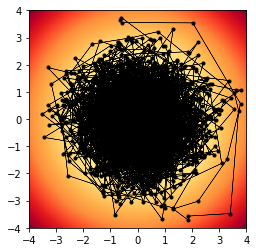

In [95]:
# plotting everything together

gaus_location = np.transpose(x_list_gaus)

horizontal, vertical = gaus_location


partial_num = 2001



partial_horizontal = horizontal[:partial_num]
partial_vertical = vertical[:partial_num]




colors = (0,0,0)
area = (np.pi*6)
# num_points = len(horizontal)



plt.imshow(ener_vals_gaus, cmap='YlOrRd', extent=[-4, 4, -4, 4])

plt.yticks(np.arange(-4, 5, 1))
plt.xticks(np.arange(-4, 5, 1))
plt.axes().set_aspect('equal')

plt.scatter(partial_horizontal, partial_vertical, s=area/2, c = np.array([[0,0,0]]))    # if this example code is correct, 1st arg is x-axis; 2nd arg is y-axis.
# plt.title('Running Basic BPS on Standard Gaussian')

for i in range(partial_num - 1):
    plt.arrow(partial_horizontal[i], partial_vertical[i], partial_horizontal[i+1]-partial_horizontal[i], 
              partial_vertical[i+1]-partial_vertical[i], width=0.000001, length_includes_head=True, 
              head_width=0.01, shape='full', linewidth = 0.45)


# plt.annotate('start', xy=(1, 2), xytext=(1.1,2.1) )


example_bounce_1 = (horizontal[1], vertical[1])
example_bounce_1_text = (-3.4, vertical[1] - 0.47)
example_bounce_2 = (horizontal[2], vertical[2])
example_bounce_2_text = (horizontal[2] + 0.1, vertical[2] - 0.38)
example_refreshment = (horizontal[5], vertical[5])
example_refreshment_text = (-2.2, vertical[5] + 0.2)


# plt.annotate('bounce', xy = example_bounce_1, xytext = example_bounce_1_text)
# plt.annotate('bounce', xy = example_bounce_2, xytext = example_bounce_2_text)
# plt.annotate('refresh', xy = example_refreshment, xytext = example_refreshment_text)


plt.show()

# 26-5-2020: Supervisory Meeting with Ben (Discussion about the codes)

1. Ben's testing whether the horizontal samples form a standard Gaussian.

2. Some further instructions/work he gave me for the following week.

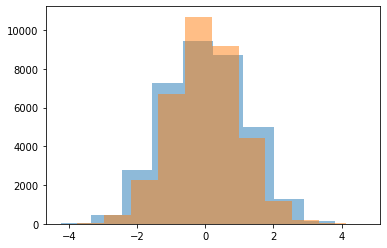

In [14]:
# Supervisor's meeting: with Ben (26 May)

x_list_gaus, v_list_gaus, t_list_gaus = BPS_basic(x0=x0, v0=v0, Time=50000, lambda_ref=lambda_ref, prob_dist=prob_dist)



gaus_location = np.transpose(x_list_gaus)

horizontal, vertical = gaus_location


a1 = np.random.normal(loc=0, scale=1, size=len(horizontal)) # make dynamic




plt.hist(horizontal, alpha=0.5)

plt.hist(a1, alpha=0.5)
plt.show()



# compare how adaptive thinning (approx method) affects efficiency (e.g. do it on Gaussian - exponential family)

In [1]:
# gradual change; demonstrate this algorithm


# (me: don't understand this; animation of movement of particles, or fixed images
# but having intermediate points. Or do you want animations of histogram?)




TypeError: object of type 'int' has no len()

# 26-5-2020: Plot some Figures to show to PINTS Research Group

Remark:

1. Time is adjusted to 100
2. 4 trajectory graphs are plotted: first 10 turns; then 20; then 40; then 60.

In [27]:
x0 = np.array([1,2])
v0 = np.array([-4,-3])
Time = 2000
lambda_ref = 0.2
prob_dist = gaus_test

x_list_gaus, v_list_gaus, t_list_gaus = BPS_basic(x0=x0, v0=v0, Time=Time, lambda_ref=lambda_ref, prob_dist=prob_dist)



gaus_location = np.transpose(x_list_gaus)

array([[ 1.        , -1.03270239, -0.87592906,  1.47014293, -0.5454696 ,
        -1.30397298,  0.78765521,  1.08108832, -0.12985517, -1.13745865,
        -0.35316106,  1.44907056,  0.04069947, -2.01198022,  2.65358571,
        -0.64219399, -1.07455953, -0.77884957, -0.80339265, -0.74839006],
       [ 2.        ,  0.47547321, -1.95816821, -0.11767135,  2.0640828 ,
        -1.18837204, -0.90125698,  0.1559487 ,  2.09921399, -0.07649563,
        -1.30549321, -0.38002773,  1.75356576, -1.06263235, -0.91850092,
         1.84253798, -0.26104859, -0.62721229, -0.63845465, -0.61866155]])

C:\Users\chris\Desktop\2019-11-03-Anaconda\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


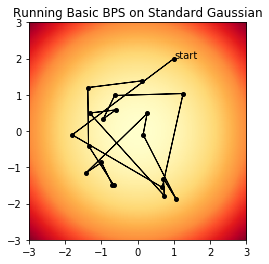

In [32]:


horizontal_1, vertical_1 = gaus_location[:,:20]

colors = (0,0,0)
area = (np.pi*10)
num_points = len(horizontal_1)

# Plot

plt.imshow(ener_vals_gaus, cmap='YlOrRd', extent=[-3, 3, -3, 3])

plt.yticks(np.arange(-3, 4, 1))
plt.xticks(np.arange(-3, 4, 1))
plt.axes().set_aspect('equal')

plt.scatter(horizontal_1, vertical_1, s=area/2, c = np.array([[0,0,0]]))    # if this example code is correct, 1st arg is x-axis; 2nd arg is y-axis.
plt.title('Running Basic BPS on Standard Gaussian')

for i in range(num_points-1):
    plt.arrow(horizontal_1[i], vertical_1[i], horizontal_1[i+1]-horizontal_1[i], vertical_1[i+1]-vertical_1[i], width=0.0001, length_includes_head=True, head_width=0.0001, shape='full')


plt.annotate('start', (1, 2))
    

plt.show()

C:\Users\chris\Desktop\2019-11-03-Anaconda\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


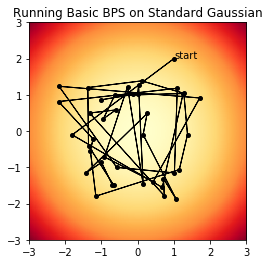

In [34]:


horizontal_1, vertical_1 = gaus_location[:,:40]

colors = (0,0,0)
area = (np.pi*10)
num_points = len(horizontal_1)

# Plot

plt.imshow(ener_vals_gaus, cmap='YlOrRd', extent=[-3, 3, -3, 3])

plt.yticks(np.arange(-3, 4, 1))
plt.xticks(np.arange(-3, 4, 1))
plt.axes().set_aspect('equal')

plt.scatter(horizontal_1, vertical_1, s=area/2, c = np.array([[0,0,0]]))    # if this example code is correct, 1st arg is x-axis; 2nd arg is y-axis.
plt.title('Running Basic BPS on Standard Gaussian')

for i in range(num_points-1):
    plt.arrow(horizontal_1[i], vertical_1[i], horizontal_1[i+1]-horizontal_1[i], vertical_1[i+1]-vertical_1[i], width=0.0001, length_includes_head=True, head_width=0.0001, shape='full')


plt.annotate('start', (1, 2))
    

plt.show()

C:\Users\chris\Desktop\2019-11-03-Anaconda\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


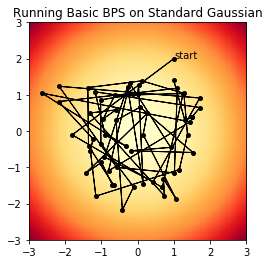

In [35]:


horizontal_1, vertical_1 = gaus_location[:,:60]

colors = (0,0,0)
area = (np.pi*10)
num_points = len(horizontal_1)

# Plot

plt.imshow(ener_vals_gaus, cmap='YlOrRd', extent=[-3, 3, -3, 3])

plt.yticks(np.arange(-3, 4, 1))
plt.xticks(np.arange(-3, 4, 1))
plt.axes().set_aspect('equal')

plt.scatter(horizontal_1, vertical_1, s=area/2, c = np.array([[0,0,0]]))    # if this example code is correct, 1st arg is x-axis; 2nd arg is y-axis.
plt.title('Running Basic BPS on Standard Gaussian')

for i in range(num_points-1):
    plt.arrow(horizontal_1[i], vertical_1[i], horizontal_1[i+1]-horizontal_1[i], vertical_1[i+1]-vertical_1[i], width=0.0001, length_includes_head=True, head_width=0.0001, shape='full')


plt.annotate('start', (1, 2))
    

plt.show()

C:\Users\chris\Desktop\2019-11-03-Anaconda\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


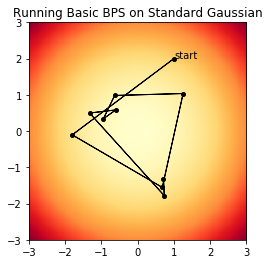

In [39]:


horizontal_1, vertical_1 = gaus_location[:,:10]

colors = (0,0,0)
area = (np.pi*10)
num_points = len(horizontal_1)

# Plot

plt.imshow(ener_vals_gaus, cmap='YlOrRd', extent=[-3, 3, -3, 3])

plt.yticks(np.arange(-3, 4, 1))
plt.xticks(np.arange(-3, 4, 1))
plt.axes().set_aspect('equal')

plt.scatter(horizontal_1, vertical_1, s=area/2, c = np.array([[0,0,0]]))    # if this example code is correct, 1st arg is x-axis; 2nd arg is y-axis.
plt.title('Running Basic BPS on Standard Gaussian')

for i in range(num_points-1):
    plt.arrow(horizontal_1[i], vertical_1[i], horizontal_1[i+1]-horizontal_1[i], vertical_1[i+1]-vertical_1[i], width=0.0001, length_includes_head=True, head_width=0.0001, shape='full')


plt.annotate('start', (1, 2))
    

plt.show()

# Task 1: modify my Basic BPS algorithm to accommodate time at any instances; testing and debugging that code; plot histograms

In [13]:
mean = np.array([0,0])
cov_mat = np.array([[1,0],[0,1]])

gaus_test = Gaussian(mean, cov_mat)

In [15]:
x0 = np.array([5,5])
v0 = np.array([-4,-3])
Time = 5000
lambda_ref = 0.2
prob_dist = gaus_test
intermediate_times = ['turning_pts', 'N/A']



# turnings: {x_list, v_list, t_list}; required_intermediate: {x_list, v_list, t_list}
x_list_gaus, v_list_gaus, t_list_gaus = BPS_basic(x0=x0, v0=v0, Time=Time, lambda_ref=lambda_ref, prob_dist=prob_dist, intermediate_times = intermediate_times)

In [16]:
rand_time_instants = np.random.uniform(0,5000,(len(x_list_gaus)))

x_rand_times, v_rand_times, t_rand_times = x_v_t_arbitrary_times(x_list_gaus, v_list_gaus, t_list_gaus, rand_time_instants)

In [19]:
len(x_list_gaus)

3603

No errors returned. Also, cannot observe anything abnormal with x_list_interm_gaus, v_list_interm_gaus, t_list_interm_gaus

In [64]:
np.array(x_list_interm_gaus)

array([[ 5.        ,  5.        ],
       [ 3.26740932,  4.16286861],
       [ 2.08822913,  4.6223388 ],
       ...,
       [ 0.90090303,  0.29865139],
       [ 0.37397339,  0.02556273],
       [-0.51315507,  0.35085588]])

In [62]:
t_list_gaus[-1]

5000.260992965694

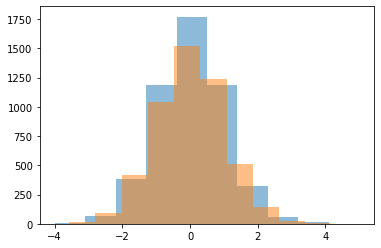

In [65]:

gaus_location = np.transpose(np.array(x_list_interm_gaus))

horizontal, vertical = gaus_location


a1 = np.random.normal(loc=0, scale=1, size=len(horizontal))     # make dynamic




plt.hist(horizontal, alpha=0.5)

plt.hist(a1, alpha=0.5)
plt.show()



# Task 1.5: Comparison between sampling the turning points, and randomised selection of time points within the travelling time interval

In [20]:
turning_locations = np.transpose(np.array(x_list_gaus))
horizontal_turning, vertical_turning = turning_locations


rand_locations = np.transpose(np.array(x_rand_times))
horizontal_rand, vertical_rand = rand_locations


a1 = np.random.normal(loc=0, scale=1, size=len(horizontal_turning))

Comparison between the 2

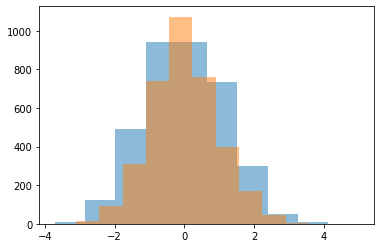

In [29]:
plt.hist(horizontal_turning, alpha=0.5, label='BPS changing points')
plt.hist(horizontal_rand, alpha=0.5, label='BPS random times')

plt.show()

Comparison between sampling turning points and sampling directly from standard Gaussian

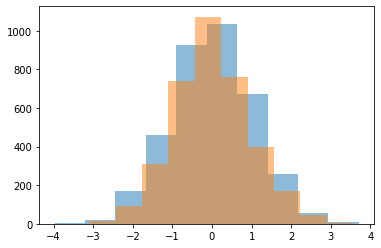

In [23]:
plt.hist(a1, alpha=0.5, label='from standard gaus')
plt.hist(horizontal_rand, alpha=0.5, label='BPS random times')
plt.show()

Comparison between sampling time points randomly selected and sampling directly from standard Gaussian

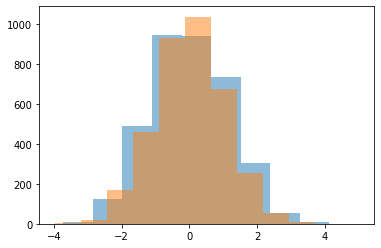

In [24]:
plt.hist(horizontal_turning, alpha=0.5, label='BPS changing points')
plt.hist(a1, alpha=0.5, label='from stand gaus')
plt.show()

# Task 2: test my Basic BPS algorithm on other multivariate Gaussian distributions

In [66]:
mean = np.array([-9,-10])
cov_mat = np.array([[5,3],[3,5]])

gaus_test = Gaussian(mean, cov_mat)

In [86]:
x0 = np.array([-4,-6])
v0 = np.array([5,0])
Time = 30
lambda_ref = 0.2
prob_dist = gaus_test
intermediate_times = random



# turnings: {x_list, v_list, t_list}; required_intermediate: {x_list, v_list, t_list}
x_list_gaus, v_list_gaus, t_list_gaus = BPS_basic(x0=x0, v0=v0, Time=Time, lambda_ref=lambda_ref, prob_dist=prob_dist, intermediate_times = intermediate_times)

In [82]:
tuple(x0)

(-4, -6)

In [107]:
# np arrays for colourmap

x_coord_raw = np.linspace(-16.0, -2.0, num=501)
x_coord = np.tile(x_coord_raw, (501,1))
y_coord = -np.transpose(x_coord) - 19

x_and_mu = x_coord + 9
y_and_mu = y_coord + 10

color_magnification = 500

ener_vals_gaus = (5*(x_and_mu*x_and_mu) + 5*(y_and_mu*y_and_mu) - 6*(x_and_mu*y_and_mu))*color_magnification

C:\Users\chris\Desktop\2019-11-03-Anaconda\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


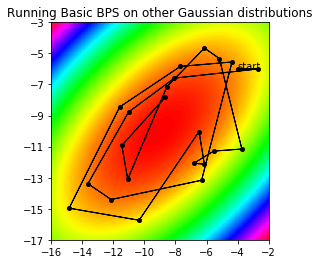

In [109]:
# plotting everything together

gaus_location = np.transpose(x_list_gaus)

horizontal, vertical = gaus_location

colors = np.array([0,0,0])
area = (np.pi*10)
num_points = len(horizontal)

# Plot

plt.imshow(ener_vals_gaus, cmap='hsv', extent=[-16, -2, -17, -3])

plt.yticks(np.arange(-17, -2, 2))
plt.xticks(np.arange(-16, -1, 2))
plt.axes().set_aspect('equal')

plt.scatter(horizontal, vertical, s=area/2, c = colors)    # if this example code is correct, 1st arg is x-axis; 2nd arg is y-axis.
plt.title('Running Basic BPS on other Gaussian distributions')

for i in range(num_points-1):
    plt.arrow(horizontal[i], vertical[i], horizontal[i+1]-horizontal[i], vertical[i+1]-vertical[i], width=0.0001, length_includes_head=True, head_width=0.0001, shape='full')


plt.annotate('start', tuple(x0))
    

plt.show()



# x-axis: -16;-2. y-axis: -17;-3

# Task 3: Make animation(s) of Movements of Particles